In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

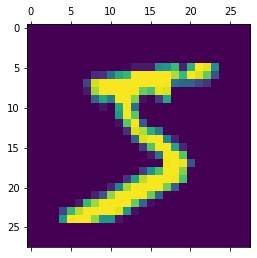

In [5]:
plt.matshow(X_train[0])

In [6]:
X_train[0].shape

(28, 28)

Using Scaling method to increase the accuracy

This method also increases the accuracy in machine learning model also

In [7]:
X_train=X_train/255
X_test=X_test/255

Falttening our image

In [8]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [9]:
X_train_flattened[0].shape

(784,)

In [10]:
# X_train_flattened[0]

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
    
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 944us/step - loss: 0.4701 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3043 - accuracy: 0.9148
Epoch 3/5
1875/1875 [==============================] - 2s 934us/step - loss: 0.2834 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 994us/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 2s 980us/step - loss: 0.2667 - accuracy: 0.9265


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 724us/step - loss: 0.2669 - accuracy: 0.9258


[0.2668619155883789, 0.9258000254631042]

In [14]:
y_predicted=model.predict(X_test_flattened)

In [15]:
y_predicted

array([[1.97147429e-02, 3.51693757e-07, 6.70931339e-02, ...,
        9.99820471e-01, 9.97545123e-02, 6.92295074e-01],
       [3.68387043e-01, 3.42240930e-03, 9.99216557e-01, ...,
        6.06228555e-13, 1.03525788e-01, 2.04929562e-09],
       [3.91185284e-04, 9.94062781e-01, 6.61616445e-01, ...,
        1.30131394e-01, 3.95872414e-01, 4.55420613e-02],
       ...,
       [4.51349297e-06, 3.16746332e-06, 1.16962194e-03, ...,
        2.67090142e-01, 5.25333464e-01, 7.48509645e-01],
       [1.30087137e-04, 1.14235925e-04, 1.37954950e-04, ...,
        2.82013971e-05, 6.00032389e-01, 9.86443629e-05],
       [6.63983822e-03, 2.83872426e-10, 1.52512610e-01, ...,
        5.80707082e-09, 1.61856413e-04, 9.15484463e-07]], dtype=float32)

In [16]:
y_predicted[0]

array([1.9714743e-02, 3.5169376e-07, 6.7093134e-02, 9.5539439e-01,
       1.8978417e-03, 1.4094642e-01, 2.2156619e-06, 9.9982047e-01,
       9.9754512e-02, 6.9229507e-01], dtype=float32)

In [17]:
np.argmax(y_predicted[0])

7

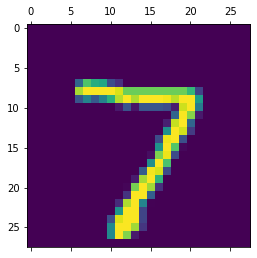

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]


[7, 2, 1, 0, 4]

In [20]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [21]:
tf.math.confusion_matrix

<function tensorflow.python.ops.confusion_matrix.confusion_matrix(labels, predictions, num_classes=None, weights=None, dtype=tf.int32, name=None)>

In [22]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    9,    2,    1,    0],
       [   0, 1109,    3,    2,    0,    2,    4,    2,   13,    0],
       [   5,    8,  923,   19,    9,    4,   13,   10,   37,    4],
       [   1,    0,   18,  925,    0,   24,    2,   11,   22,    7],
       [   1,    1,    3,    1,  916,    0,   14,    4,    9,   33],
       [   8,    2,    2,   30,    9,  786,   16,    5,   27,    7],
       [   8,    3,    7,    1,    8,   11,  917,    2,    1,    0],
       [   1,    5,   22,    7,    9,    0,    0,  950,    3,   31],
       [   7,    7,    7,   20,    9,   34,   10,   12,  861,    7],
       [  11,    7,    1,   10,   29,    9,    0,   24,    7,  911]])>

Text(69.0, 0.5, 'Truth')

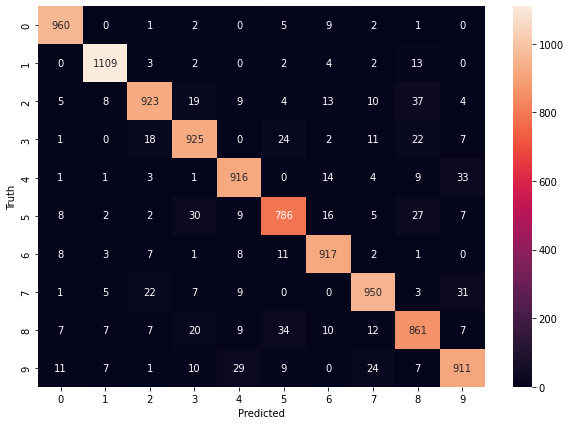

In [23]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Manually adding hidden layers

In [24]:
model=keras.Sequential([
#     here we have only one hiiden layer that is the next immediate line
    keras.layers.Dense(100,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
    
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2733 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1235 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0866 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0672 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0529 - accuracy: 0.9837


In [25]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 978us/step - loss: 0.0762 - accuracy: 0.9772


[0.07615625858306885, 0.9771999716758728]

Text(69.0, 0.5, 'Truth')

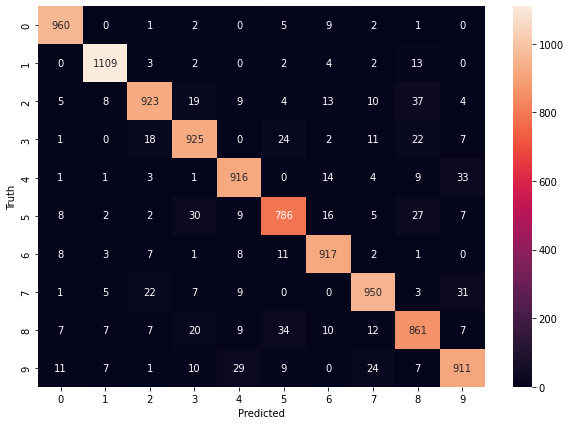

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2768 - accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1250 - accuracy: 0.9636
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0878 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0667 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0536 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0425 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0349 - accuracy: 0.9885
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0297 - accuracy: 0.9907
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0232 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.020

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0846 - accuracy: 0.9763


[0.08455643802881241, 0.9763000011444092]